In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import pickle
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem.porter import *
import string
import re
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as VS
#from textstat.textstat import *
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [ ]:

df = pd.read_csv("/content/drive/MyDrive/IIIT Ranchi Internship/HASOC dataset/HASOC_data_2021/English_training_data.csv")
df.dropna(inplace = True)
#df


In [ ]:
df.head(5)

,Unnamed: 0,_id,text,task_1,task_2
0,4986,60c5d6bf5659ea5e55defa2c,@wealth if you made it through this &amp;&amp;...,HOF,PRFN
1,3394,60c5d6bf5659ea5e55def461,Technically that's still turning back the cloc...,HOF,OFFN
2,1310,60c5d6bf5659ea5e55defaad,@VMBJP @BJP4Bengal @BJP4India @narendramodi @J...,NOT,NONE
3,3390,60c5d6bf5659ea5e55def419,@krtoprak_yigit Soldier of Japan Who has dick ...,HOF,OFFN
4,4626,60c5d6bf5659ea5e55def7fa,@blueheartedly You'd be better off asking who ...,HOF,OFFN


In [ ]:
df.tail(5)

,Unnamed: 0,_id,text,task_1,task_2
3838,1661,60c5d6bf5659ea5e55defd57,@BBCNews Let the dog deal with the wanker once...,HOF,PRFN
3839,194,60c5d6bf5659ea5e55def185,India has suffered a lot. That Chinese bastard...,HOF,HATE
3840,3988,60c5d6bf5659ea5e55def78c,People didn't give 300+ seats majority to BJP ...,HOF,HATE
3841,4212,60c5d6bf5659ea5e55defb04,"@KanganaTeam This is such a vile, xenophobic a...",HOF,PRFN
3842,1512,60c5d6bf5659ea5e55defb8a,@30iPpgStmILw0SI @ChinaDaily #ChineseVirus #Wu...,NOT,NONE


In [ ]:
df.describe()

,Unnamed: 0
count,3843.000000
mean,2558.799375
std,1477.088070
min,1.000000
25%,1276.500000
50%,2574.000000
75%,3828.000000
max,5121.000000


In [ ]:
df.columns

Index(['Unnamed: 0', '_id', 'text', 'task_1', 'task_2'], dtype='object')

<Axes: >

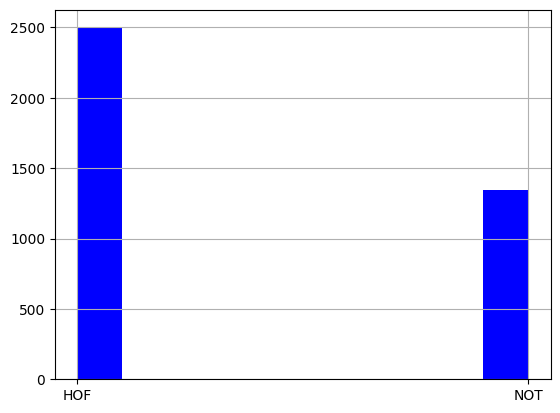

In [ ]:
df['task_1'].hist(color='Blue')

<Axes: >

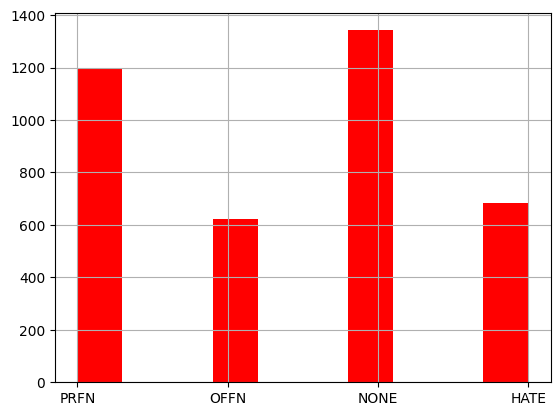

In [ ]:
df['task_2'].hist(color='red')

Feature Generations

Data Cleaning

In [ ]:
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

from gensim.models import Word2Vec

from sklearn.model_selection import train_test_split

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words= set(stopwords.words('english'))

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def clean_text(text):
    text = re.sub("#", "",text) # Removing '#' from hashtags
    text = re.sub("[^a-zA-Z#]", " ",text) # Removing punctuation and special characters
    text = re.sub(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+',"<URL>", text)
    text = re.sub('http','',text)
    text = re.sub(" +", " ", text)
    text = text.lower()
    text = word_tokenize(text)
    return_text=[]
    for word in text:
        if word not in stop_words:
            return_text.append(word)
    return return_text
df["text"]=df["text"].apply(clean_text)

In [ ]:
#def wordcloud_vis(column):
 # mostcommon = nltk.FreqDist(df[column]).most_common(100)
  #wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
  #fig = plt.figure(figsize=(30,10), facecolor='white')
 # plt.imshow(wordcloud) #, interpolation="bilinear")
  #plt.axis('off')
 # plt.show()

In [ ]:
#Plot the word-cloud before removing stopwords, performing lemmatization
#wordcloud_vis('text')

Word2Vec model to get the word embedings.

In [ ]:
model = Word2Vec(df["text"].values, vector_size=50, window=5, min_count=1, workers=4)

In [ ]:
def get_features(text):
    features=[]
    for word in text:
        features.append(model.wv[word])
    return np.mean(features,0)

In [ ]:
df["features"]=df["text"].apply(get_features)

In [ ]:
data=[]
for i in df["features"].values:
    temp=[]
    for j in i:
        temp.append(j)
    data.append(temp)
data=np.array(data)

In [ ]:
from sklearn.preprocessing import label_binarize

Y = label_binarize(df["task_2"].values, classes=['PRFN','OFFN','NONE','HATE'])
n_classes = Y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.4, random_state=42)

In [ ]:
print(X_train)
print(y_train)

[[-0.07640745 -0.03942605 -0.0180187  ... -0.13274038  0.1634666
   0.21929745]
 [-0.09359366 -0.05953718 -0.02518077 ... -0.17611536  0.22073174
   0.30083698]
 [-0.068933   -0.03480835 -0.01361075 ... -0.1128554   0.15046574
   0.20402111]
 ...
 [-0.05090071 -0.03223567 -0.00794922 ... -0.0931853   0.12037019
   0.1780148 ]
 [-0.05979382 -0.03643154 -0.00978198 ... -0.10468497  0.13854228
   0.1918256 ]
 [-0.05655756 -0.03334656 -0.00932119 ... -0.10690765  0.13416535
   0.18176253]]
[[0 1 0 0]
 [0 0 1 0]
 [1 0 0 0]
 ...
 [0 0 1 0]
 [0 0 1 0]
 [0 1 0 0]]


LOGISTIC REGRESSION MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

F1 Score:  0.011545862732520848
Precision Score:  0.42857142857142855
Recall Score:  0.005851755526657998
Accuracy:  0.0039011703511053317


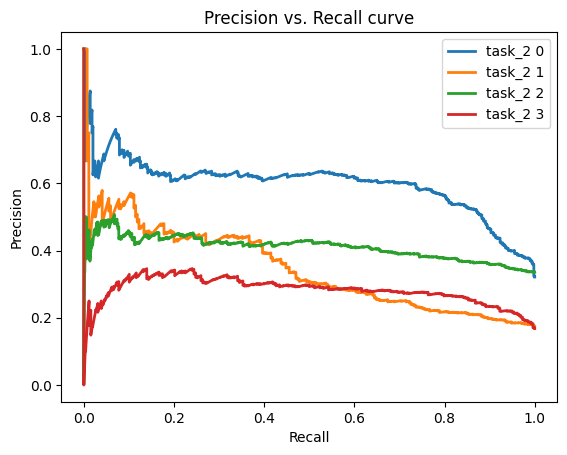

In [ ]:
lr_clf = OneVsRestClassifier(LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial'))
lr_clf.fit(X_train,y_train)
y_pred = lr_clf.predict(X_test)
f = f1_score(y_test, y_pred, average='micro')
print("F1 Score: ", f)
p = precision_score(y_test, y_pred, average='micro')
print("Precision Score: ", p)
r = recall_score(y_test, y_pred, average='micro')
print("Recall Score: ", r)
print("Accuracy: ", lr_clf.score(X_test,y_test))

y_score = lr_clf.predict_proba(X_test)
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='task_2 {}'.format(i))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc = "best")
plt.title("Precision vs. Recall curve")
plt.show()

SVM 

F1 Score:  0.002594033722438392
Precision Score:  0.5
Recall Score:  0.0013003901170351106
Accuracy:  0.0013003901170351106


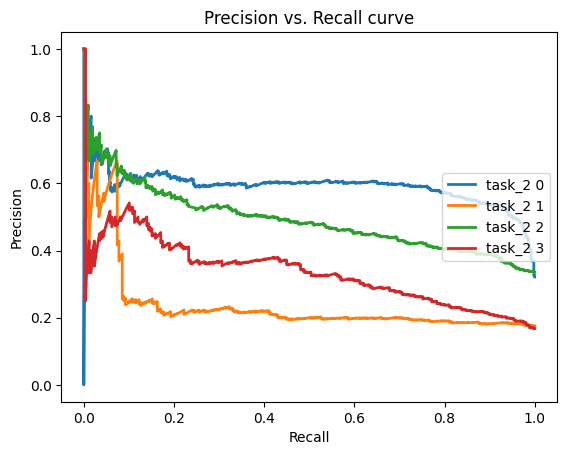

In [ ]:
svm_clf = OneVsRestClassifier(svm.SVC(gamma='scale', probability=True))
svm_clf.fit(X_train,y_train)
y_pred = svm_clf.predict(X_test)
f = f1_score(y_test, y_pred, average='micro')
print("F1 Score: ", f)
p = precision_score(y_test, y_pred, average='micro')
print("Precision Score: ", p)
r = recall_score(y_test, y_pred, average='micro')
print("Recall Score: ", r)
print("Accuracy: ", svm_clf.score(X_test,y_test))

y_score = svm_clf.predict_proba(X_test)
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='task_2 {}'.format(i))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc = "center right")
plt.title("Precision vs. Recall curve")
plt.show()

In [ ]:
from sklearn.preprocessing import label_binarize

Y = label_binarize(df["task_1"].values, classes=['HOF','NOT','NONE'])
n_classes = Y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.4, random_state=42)

In [ ]:
print(X_train)
print(y_train)

[[-0.07640745 -0.03942605 -0.0180187  ... -0.13274038  0.1634666
   0.21929745]
 [-0.09359366 -0.05953718 -0.02518077 ... -0.17611536  0.22073174
   0.30083698]
 [-0.068933   -0.03480835 -0.01361075 ... -0.1128554   0.15046574
   0.20402111]
 ...
 [-0.05090071 -0.03223567 -0.00794922 ... -0.0931853   0.12037019
   0.1780148 ]
 [-0.05979382 -0.03643154 -0.00978198 ... -0.10468497  0.13854228
   0.1918256 ]
 [-0.05655756 -0.03334656 -0.00932119 ... -0.10690765  0.13416535
   0.18176253]]
[[1 0 0]
 [0 1 0]
 [1 0 0]
 ...
 [0 1 0]
 [0 1 0]
 [1 0 0]]


LOGISTIC REGRESSION MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

F1 Score:  0.6644993498049415
Precision Score:  0.6644993498049415
Recall Score:  0.6644993498049415
Accuracy:  0.6644993498049415


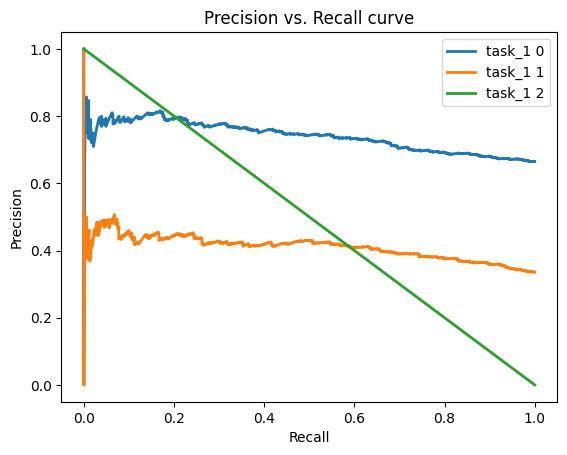

In [ ]:
lr_clf = OneVsRestClassifier(LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial'))
lr_clf.fit(X_train,y_train)
y_pred = lr_clf.predict(X_test)
f = f1_score(y_test, y_pred, average='micro')
print("F1 Score: ", f)
p = precision_score(y_test, y_pred, average='micro')
print("Precision Score: ", p)
r = recall_score(y_test, y_pred, average='micro')
print("Recall Score: ", r)
print("Accuracy: ", lr_clf.score(X_test,y_test))

y_score = lr_clf.predict_proba(X_test)
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='task_1 {}'.format(i))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc = "best")
plt.title("Precision vs. Recall curve")
plt.show()

SVM

F1 Score:  0.6644993498049415
Precision Score:  0.6644993498049415
Recall Score:  0.6644993498049415
Accuracy:  0.6644993498049415


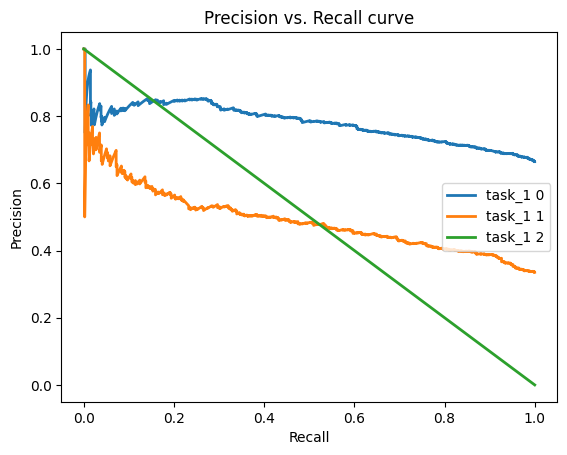

In [ ]:
svm_clf = OneVsRestClassifier(svm.SVC(gamma='scale', probability=True))
svm_clf.fit(X_train,y_train)
y_pred = svm_clf.predict(X_test)
f = f1_score(y_test, y_pred, average='micro')
print("F1 Score: ", f)
p = precision_score(y_test, y_pred, average='micro')
print("Precision Score: ", p)
r = recall_score(y_test, y_pred, average='micro')
print("Recall Score: ", r)
print("Accuracy: ", svm_clf.score(X_test,y_test))

y_score = svm_clf.predict_proba(X_test)
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='task_1 {}'.format(i))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc = "center right")
plt.title("Precision vs. Recall curve")
plt.show()